In [2]:
from __future__ import division
from matplotlib.pyplot import figure

In [8]:
import matplotlib.pyplot as plt
import pandas as pd
import math
import scipy
from scipy import stats
import copy
import numpy as np
%matplotlib inline

In [4]:
def read_in_data(path):
    df = pd.DataFrame()
    for i in range(0,100):
        x=pd.read_csv(path+'meta_analysis_files_causal/sim0_'+str(i)+'.sumstats.pruned.sim0_'+str(i)+'.exclude.meta.txt',sep='\t',header=0)
        df=df.append(x)
    return df    
    

In [27]:
def plot_pvalues(df,pathway,which_p):
    plt.rcParams["figure.figsize"] = [16,9]
    plt.hist(df[which_p],bins=500)
    plt.xlabel('Probability')
    plt.axvline(x=.05, color='r', linestyle='dashed', linewidth=1)
    plt.title("Histogram of "+ which_p + ' '+ pathway + " is Causal");

In [28]:
def fdr(p):
    p = copy.deepcopy(p)
    p.sort()
    c = np.arange(1,len(p)+1)*0.05/len(p)
    cutoff_fdr = 0
    for i in range(len(p)):
        if p[i] < c[i]:
            cutoff_fdr = p[i]
    return cutoff_fdr

Plotting 5 Causal Gene Simulations, multiple==10; Pathway name: ST_IL_13_PATHWAY

In [29]:
df5=read_in_data('/broad/finucanelab/ktashman/inrich_analyses/simulations/causal5/')

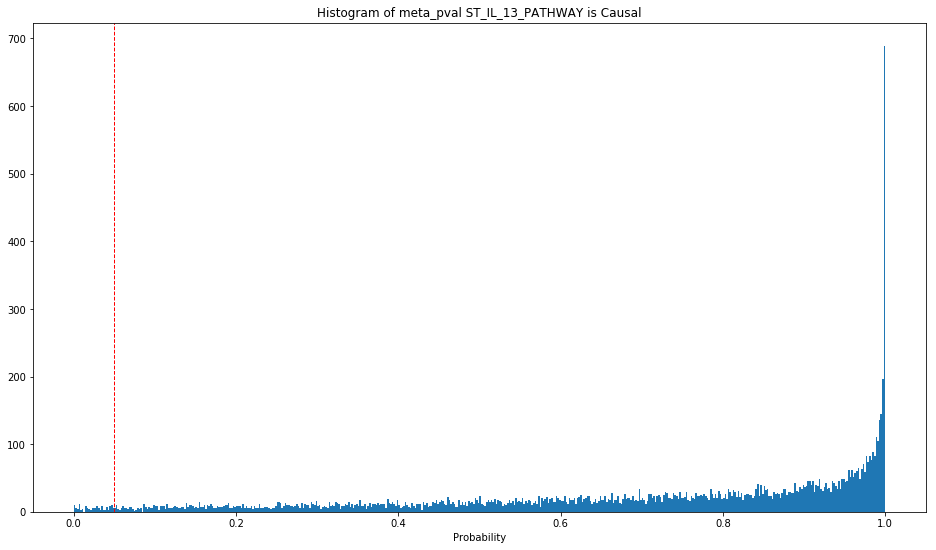

In [30]:
plot_pvalues(df5,'ST_IL_13_PATHWAY','meta_pval')

138 gene sets have a p-value < .05 in all 100 simulations where the true causal gene set is ST_IL_13_PATHWAY

In [50]:
under_thresh=len(df5[df5.meta_pval<.05])
print("The number of gene sets out of all 100 simulations that had a p-value < 0.05: {0}".format(under_thresh))

The number of gene sets out of all 100 simulations that had a p-value < 0.05: 138


Out of all 100 simulations, only 4 had a geneset pass FDR 5%; of those 4 simulations, two of them had ST_IL_13_PATHWAY pass FDR, two had KORKOLA_TERATOMA_UP pass FDR

In [51]:
print("The number of simulations where a geneset passed FDR 5%: {0}".format(sum(df5.pass_meta==True)))
ST_IL = df5[df5.GS=='ST_IL_13_PATHWAY_L2_'].sort_values(by='meta_pval')
print("The number of times ST_IL_13_PATHWAY passed FDR 5% in a simulation: {0}".format(sum(ST_IL.pass_meta==True)))

The number of simulations where a geneset passed FDR 5%: 4
The number of times ST_IL_13_PATHWAY passed FDR 5% in a simulation: 2


Number of genesets that pass FDR among ALL 100 simulations for Inrich, S-LDSC and Meta-analysis

In [54]:
cutoff_meta5 = fdr(df5.meta_pval.values)*1.00001
cutoff_ldsc5 = fdr(df5.Coefficient_P_value.values)*1.00001
cutoff_inrich5 = fdr(df5.P.values)*1.00001

In [55]:
print("The number of genesets that pass FDR 5% for all simulations, inrich: {0}".format(len(df5[df5.P<cutoff_inrich5])))

print("The number of genesets that pass FDR 5% for all simulations, ldsc: {0}".format(len(df5[df5.Coefficient_P_value<cutoff_ldsc5])))

print("The number of genesets that pass FDR 5% for all simulations, meta analysis: {0}".format(len(df5[df5.meta_pval<cutoff_meta5])))

The number of genesets that pass FDR 5% for all simulations, inrich: 0
The number of genesets that pass FDR 5% for all simulations, ldsc: 2
The number of genesets that pass FDR 5% for all simulations, meta analysis: 2


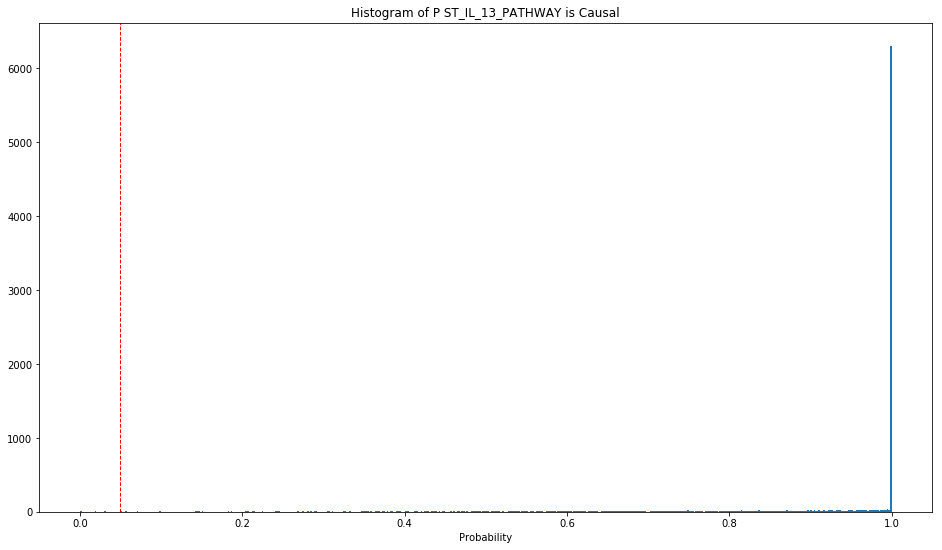

In [31]:
plot_pvalues(df5,'ST_IL_13_PATHWAY','P')

In [24]:
under_thresh_inrich=len(df5[df5.P<.05])
print(under_thresh_inrich)
print(under_thresh_inrich/len(df5))

64
0.006376407293015841


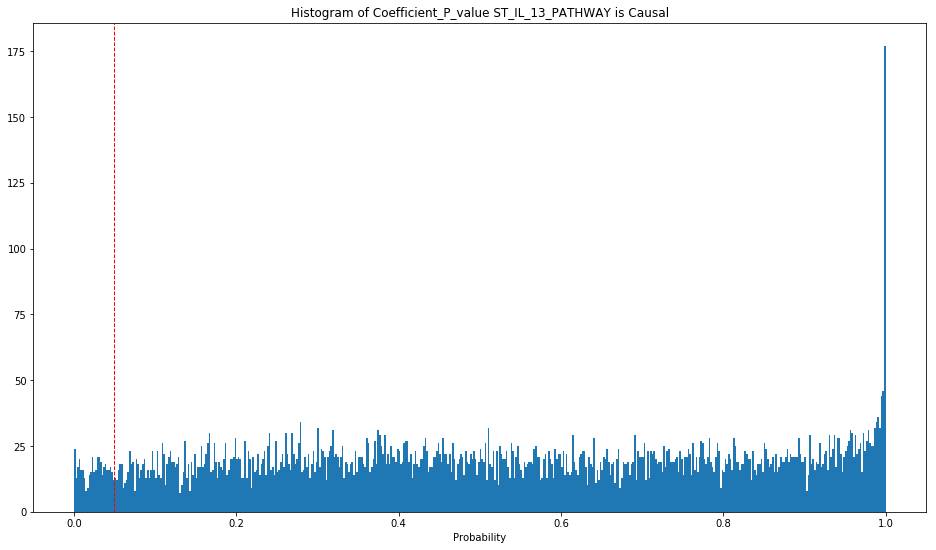

In [32]:
plot_pvalues(df5,'ST_IL_13_PATHWAY','Coefficient_P_value')

In [25]:
under_thresh_ldsc=len(df5[df5.Coefficient_P_value<.05])
print(under_thresh_ldsc)
print(under_thresh_ldsc/len(df5))

403
0.040151439673209124


Plotting 5 Causal Gene Simulations, multiple==100; Pathway name: ST_IL_13_PATHWAY

In [56]:
df5_tau100 = read_in_data('/broad/finucanelab/ktashman/inrich_analyses/simulations/causal5_tau100/')

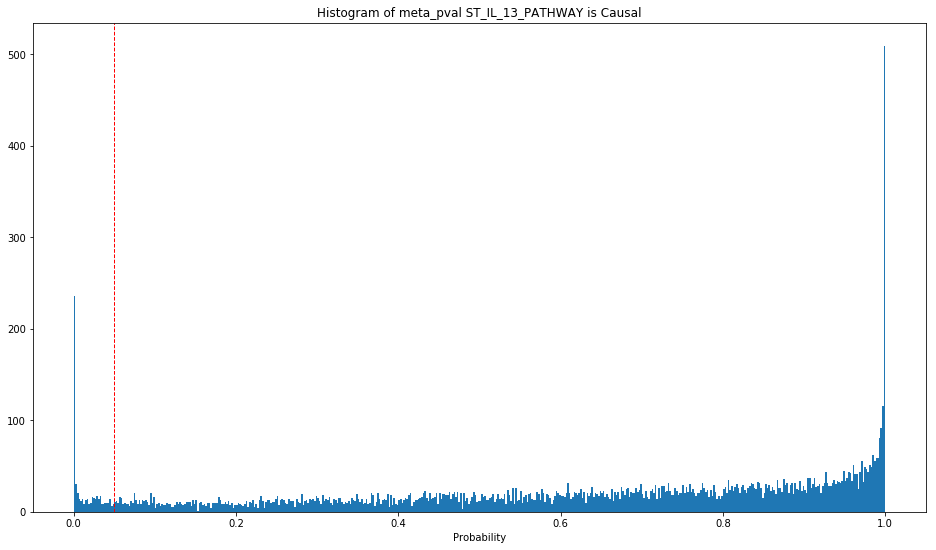

In [57]:
plot_pvalues(df5_tau100,'ST_IL_13_PATHWAY','meta_pval')

In [59]:
ST_IL_tau100 = df5_tau100[df5_tau100.GS=='ST_IL_13_PATHWAY_L2_']
print(sum(ST_IL_tau100.pass_INRICH==True))

97


In [61]:
under_thresh5_tau100=len(df5_tau100[df5_tau100.meta_pval<.05])
print("The number of gene sets out of all 100 simulations that had a p-value < 0.05: {0}".format(under_thresh5_tau100))

The number of gene sets out of all 100 simulations that had a p-value < 0.05: 550


In [62]:
print("The number of simulations where a geneset passed FDR 5%: {0}".format(sum(df5_tau100.pass_meta==True)))
ST_IL_13_PATHWAY = df5_tau100[df5_tau100.GS=='ST_IL_13_PATHWAY_L2_'].sort_values(by='meta_pval')
print("The number of times ST_IL_13_PATHWAY passed FDR 5% in a simulation: {0}".format(sum(ST_IL_13_PATHWAY.pass_meta==True)))

The number of simulations where a geneset passed FDR 5%: 220
The number of times ST_IL_13_PATHWAY passed FDR 5% in a simulation: 97


In [63]:
cutoff_meta5_tau100 = fdr(df5_tau100.meta_pval.values)*1.00001
cutoff_ldsc5_tau100 = fdr(df5_tau100.Coefficient_P_value.values)*1.00001
cutoff_inrich5_tau100 = fdr(df5_tau100.P.values)*1.00001

In [64]:
print("The number of genesets that pass FDR 5% for all simulations, inrich: {0}".format(len(df5_tau100[df5_tau100.P<cutoff_inrich5_tau100])))

print("The number of genesets that pass FDR 5% for all simulations, ldsc: {0}".format(len(df5_tau100[df5_tau100.Coefficient_P_value<cutoff_ldsc5_tau100])))

print("The number of genesets that pass FDR 5% for all simulations, meta analysis: {0}".format(len(df5_tau100[df5_tau100.meta_pval<cutoff_meta5_tau100])))

The number of genesets that pass FDR 5% for all simulations, inrich: 225
The number of genesets that pass FDR 5% for all simulations, ldsc: 55
The number of genesets that pass FDR 5% for all simulations, meta analysis: 217


Plotting 50 Causal Gene Simulations, multiple==10; Pathway name: MORF_MSH2

In [36]:
df50 = read_in_data('/broad/finucanelab/ktashman/inrich_analyses/simulations/causal50/')

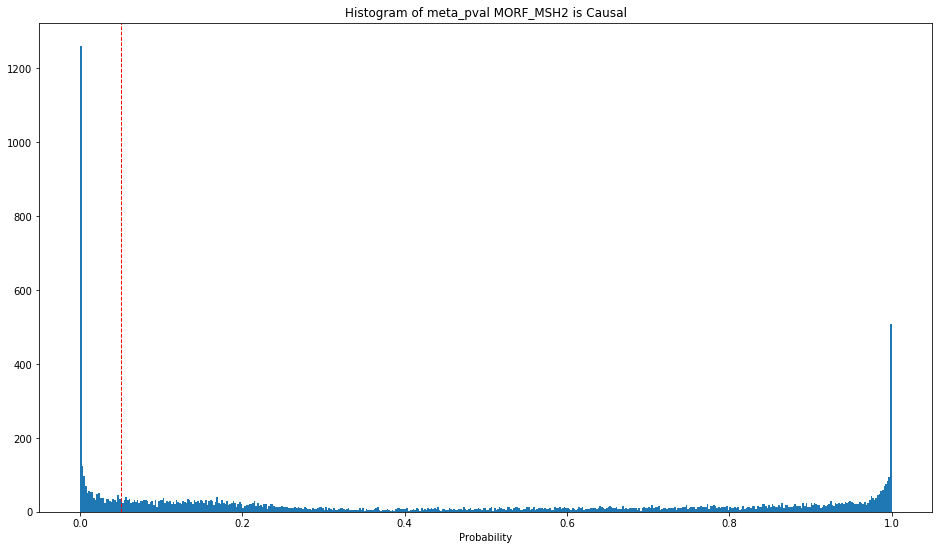

In [37]:
plot_pvalues(df50,'MORF_MSH2','meta_pval')

2359 gene sets have a p-value < .05 in all 100 simulations where the true causal gene set is ST_IL_13_PATHWAY

In [39]:
under_thresh50=len(df50[df50.meta_pval<.05])
print("The number of gene sets out of all 100 simulations that had a p-value < 0.05: {0}".format(under_thresh50))

The number of gene sets out of all 100 simulations that had a p-value < 0.05: 2359


Across all 100 simulations, 1545 genesets passed FDR 5%; In all 100 simulations, our geneset MORF_MSH2 passed FDR 5%

In [41]:
print("The number of simulations where a geneset passed FDR 5%: {0}".format(sum(df50.pass_meta==True)))
MORF_MSH2 = df50[df50.GS=='MORF_MSH2_L2_'].sort_values(by='meta_pval')
print("The number of times MORF_MSH2 passed FDR 5% in a simulation: {0}".format(sum(MORF_MSH2.pass_meta==True)))

The number of simulations where a geneset passed FDR 5%: 1545
The number of times MORF_MSH2 passed FDR 5% in a simulation: 100


In [42]:
cutoff_meta50 = fdr(df50.meta_pval.values)*1.00001
cutoff_ldsc50 = fdr(df50.Coefficient_P_value.values)*1.00001
cutoff_inrich50 = fdr(df50.P.values)*1.00001

Number of genesets that pass FDR among ALL 100 simulations for Inrich, S-LDSC and Meta-analysis

In [43]:
print("The number of genesets that pass FDR 5% for all simulations, inrich: {0}".format(len(df50[df50.P<cutoff_inrich50])))

print("The number of genesets that pass FDR 5% for all simulations, ldsc: {0}".format(len(df50[df50.Coefficient_P_value<cutoff_ldsc50])))

print("The number of genesets that pass FDR 5% for all simulations, meta analysis: {0}".format(len(df50[df50.meta_pval<cutoff_meta50])))

The number of genesets that pass FDR 5% for all simulations, inrich: 83
The number of genesets that pass FDR 5% for all simulations, ldsc: 2059
The number of genesets that pass FDR 5% for all simulations, meta analysis: 1537


Plotting 500 causal gene set, multiple==10; Pathway name:CTGCAGY_UNKNOWN 

In [45]:
df500 = read_in_data('/broad/finucanelab/ktashman/inrich_analyses/simulations/causal500/')

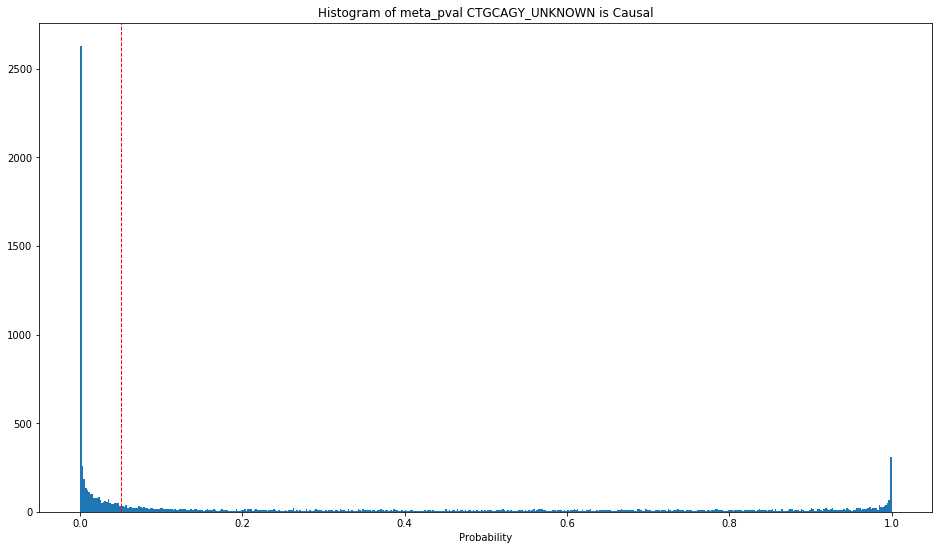

In [46]:
plot_pvalues(df500,'CTGCAGY_UNKNOWN','meta_pval')

In [48]:
under_thresh500=len(df500[df500.meta_pval<.05])
print("The number of gene sets out of all 100 simulations that had a p-value < 0.05: {0}".format(under_thresh500))

The number of gene sets out of all 100 simulations that had a p-value < 0.05: 4639


In [49]:
print("The number of simulations where a geneset passed FDR 5%: {0}".format(sum(df500.pass_meta==True)))
CTGCAGY_UNKNOWN = df500[df500.GS=='CTGCAGY_UNKNOWN_L2_'].sort_values(by='meta_pval')
print("The number of times CTGCAGY_UNKNOWN passed FDR 5% in a simulation: {0}".format(sum(CTGCAGY_UNKNOWN.pass_meta==True)))

The number of simulations where a geneset passed FDR 5%: 3749
The number of times CTGCAGY_UNKNOWN passed FDR 5% in a simulation: 100


In [52]:
cutoff_meta500 = fdr(df500.meta_pval.values)*1.00001
cutoff_ldsc500 = fdr(df500.Coefficient_P_value.values)*1.00001
cutoff_inrich500 = fdr(df500.P.values)*1.00001

In [53]:
print("The number of genesets that pass FDR 5% for all simulations, inrich: {0}".format(len(df500[df500.P<cutoff_inrich500])))

print("The number of genesets that pass FDR 5% for all simulations, ldsc: {0}".format(len(df500[df500.Coefficient_P_value<cutoff_ldsc500])))

print("The number of genesets that pass FDR 5% for all simulations, meta analysis: {0}".format(len(df500[df500.meta_pval<cutoff_meta500])))

The number of genesets that pass FDR 5% for all simulations, inrich: 105
The number of genesets that pass FDR 5% for all simulations, ldsc: 4899
The number of genesets that pass FDR 5% for all simulations, meta analysis: 3752
